# **Data Preprocessing**
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1nAFpPUXf1UI76ZsGqArxJCmHdgSjoKb7?usp=sharing)


# **Get into Root Folder**

The dataset is stored on root > dataset

In [166]:
from google.colab import drive
drive.mount('/content/drive')
FOLDER_NAME = 'Kaggle-ML/Neuromatch_Project'
FOLDER_PATH = f'drive/My Drive/{FOLDER_NAME}/'
%cd "{FOLDER_PATH}"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/My Drive/Kaggle-ML/Neuromatch_Project/'
/content/drive/My Drive/Kaggle-ML/Neuromatch_Project




This variable must point to the root folder of the dataset

In [167]:
DATASET_ROOT = 'dataset'
TRAIN_FOLDER = f'{DATASET_ROOT}/Training'
TEST_FOLDER = f'{DATASET_ROOT}/Testing'

# **Basic EDA**

#### **Setting up config**

**Importing libraries to be used in this section:**

In [168]:
import matplotlib.pyplot as plt 
import matplotlib.image as img
import pandas as pd
import PIL.Image as Image 
import numpy as np
import cv2 
import random
import os

**View sample image**


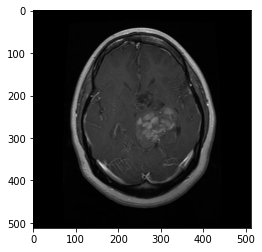

In [169]:
%matplotlib inline
rgb_list = []
sample_image = img.imread(f'{DATASET_ROOT}/Training/glioma_tumor/gg (1).jpg')
plt.imshow(sample_image)

**What is the shape / resolution of the pictures?**

In [170]:
sample_image.shape

(512, 512, 3)

**Listing images in train and test sets.**

`train_images` and `tests_images` are array that follow this structure: `[path to image, folder(class)]`

In [171]:
def get_images_listed(path_to_folder):
  images = []
  for folder in os.listdir(path_to_folder):
    for image in os.listdir(path_to_folder + '/' + folder):
      
      image_path = os.path.join(path_to_folder, folder, image)
      image_class = folder
      image_size = os.path.getsize(image_path)
      
      # identify shape info of the image
      image_height, image_width, image_channels = img.imread(image_path).shape
      images.append([image_path,image_class, image_size, image_height, image_width, image_channels])
  return images

In [172]:
train_images = get_images_listed(TRAIN_FOLDER)

In [173]:
train_images

[['dataset/Training/glioma_tumor/gg (581).jpg',
  'glioma_tumor',
  19035,
  512,
  512,
  3],
 ['dataset/Training/glioma_tumor/gg (438).jpg',
  'glioma_tumor',
  24346,
  512,
  512,
  3],
 ['dataset/Training/glioma_tumor/gg (201).jpg',
  'glioma_tumor',
  27781,
  512,
  512,
  3],
 ['dataset/Training/glioma_tumor/gg (136).jpg',
  'glioma_tumor',
  25395,
  512,
  512,
  3],
 ['dataset/Training/glioma_tumor/gg (569).jpg',
  'glioma_tumor',
  20819,
  512,
  512,
  3],
 ['dataset/Training/glioma_tumor/gg (26).jpg',
  'glioma_tumor',
  21242,
  512,
  512,
  3],
 ['dataset/Training/glioma_tumor/gg (210).jpg',
  'glioma_tumor',
  27898,
  512,
  512,
  3],
 ['dataset/Training/glioma_tumor/gg (574).jpg',
  'glioma_tumor',
  21389,
  512,
  512,
  3],
 ['dataset/Training/glioma_tumor/gg (20).jpg',
  'glioma_tumor',
  21386,
  512,
  512,
  3],
 ['dataset/Training/glioma_tumor/gg (294).jpg',
  'glioma_tumor',
  26148,
  512,
  512,
  3],
 ['dataset/Training/glioma_tumor/gg (579).jpg',
  'g

In [174]:
test_images = []
for folder in os.listdir(TEST_FOLDER):
  for image in os.listdir(TEST_FOLDER + '/' + folder):
    test_images.append([os.path.join(TRAIN_FOLDER, folder, image),folder])

In [175]:
test_images

[['dataset/Training/glioma_tumor/image(100).jpg', 'glioma_tumor'],
 ['dataset/Training/glioma_tumor/image(2).jpg', 'glioma_tumor'],
 ['dataset/Training/glioma_tumor/image(17).jpg', 'glioma_tumor'],
 ['dataset/Training/glioma_tumor/image(12).jpg', 'glioma_tumor'],
 ['dataset/Training/glioma_tumor/image(19).jpg', 'glioma_tumor'],
 ['dataset/Training/glioma_tumor/image(1).jpg', 'glioma_tumor'],
 ['dataset/Training/glioma_tumor/image(15).jpg', 'glioma_tumor'],
 ['dataset/Training/glioma_tumor/image(14).jpg', 'glioma_tumor'],
 ['dataset/Training/glioma_tumor/image(10).jpg', 'glioma_tumor'],
 ['dataset/Training/glioma_tumor/image(16).jpg', 'glioma_tumor'],
 ['dataset/Training/glioma_tumor/image(13).jpg', 'glioma_tumor'],
 ['dataset/Training/glioma_tumor/image(18).jpg', 'glioma_tumor'],
 ['dataset/Training/glioma_tumor/image(11).jpg', 'glioma_tumor'],
 ['dataset/Training/glioma_tumor/image(75).jpg', 'glioma_tumor'],
 ['dataset/Training/glioma_tumor/image(60).jpg', 'glioma_tumor'],
 ['dataset/

**View random array of images**


In [176]:
def display_random_images(images):
  plt.figure(1, figsize=(15, 9))
  plt.axis('off')
  n = 0
  for i in range(16):
    n += 1
    random_img = random.choice(images)
    imgs = img.imread(random_img[0])
    plt.subplot(4, 4, n)
    plt.imshow(imgs)

  plt.show()

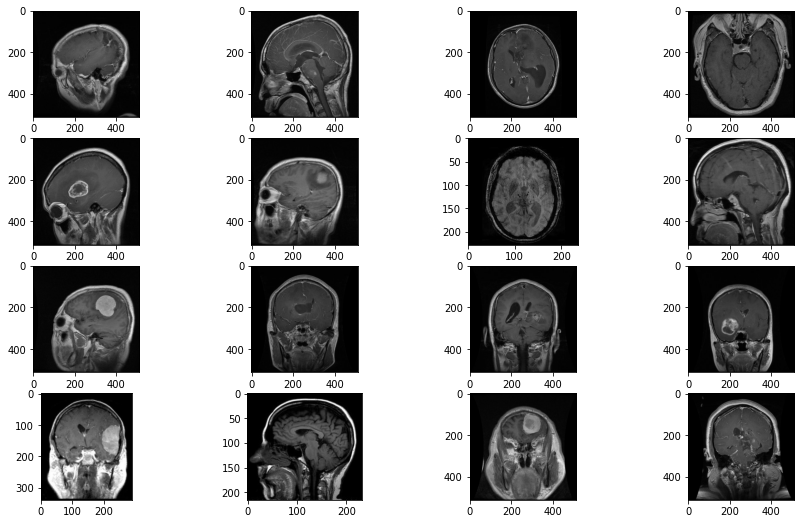

In [177]:
display_random_images(train_images)

Convert arrays to dataframes


In [178]:
# Converting to np arrays
train_images = np.array(train_images)
test_images = np.array(test_images)

# Converting to dataframes
train_df = pd.DataFrame(train_images, columns = ['Path','Class','Size', 'Height', 'Width', 'Channel'])
test_df = pd.DataFrame(test_images, columns = ['Path','Class'])

In [179]:
train_df.head()

,Path,Class,Size,Height,Width,Channel
0,dataset/Training/glioma_tumor/gg (581).jpg,glioma_tumor,19035,512,512,3
1,dataset/Training/glioma_tumor/gg (438).jpg,glioma_tumor,24346,512,512,3
2,dataset/Training/glioma_tumor/gg (201).jpg,glioma_tumor,27781,512,512,3
3,dataset/Training/glioma_tumor/gg (136).jpg,glioma_tumor,25395,512,512,3
4,dataset/Training/glioma_tumor/gg (569).jpg,glioma_tumor,20819,512,512,3


What are the sizes of the images?

In [180]:
image_sizes = train_df.groupby(['Height']).Height.count()

In [181]:
image_sizes.count()

219

In [182]:
pd.set_option('max_rows', 1000)
image_sizes

Height
1019       1
1024       2
1075       1
1280       1
1365       1
1427       1
1446       1
198        1
200        1
201        2
202        2
203        1
207        2
208        1
210        4
211        1
212        3
213        4
214        3
215        1
216        7
217        3
218        7
219        1
220        4
221        4
222        4
223        7
224        3
225       35
226        2
227        4
228        5
229        2
231        3
232        2
233        1
234        7
235        3
236       52
237        4
238        1
239        3
240        3
241        2
242        4
243        8
244        4
245        1
247        1
248        7
249        4
250        5
251       14
252        4
253        1
256       15
257        5
258        2
259        1
260        5
261        2
262        5
263        2
264        3
268        1
269        4
270        2
273        2
274        2
275        4
277        1
278        1
280        6
284        1
286        1
290  

How many samples does the training set have?

In [183]:
train_df.count()

Path       2870
Class      2870
Size       2870
Height     2870
Width      2870
Channel    2870
dtype: int64

How many samples does the test set have?

In [184]:
test_df.count()

Path     394
Class    394
dtype: int64

How many images does the dataset have of each class? What is the distribution of training and test set?

In [185]:
train_dis = train_df['Class'].value_counts()
train_dis

pituitary_tumor     827
glioma_tumor        826
meningioma_tumor    822
no_tumor            395
Name: Class, dtype: int64

<BarContainer object of 4 artists>

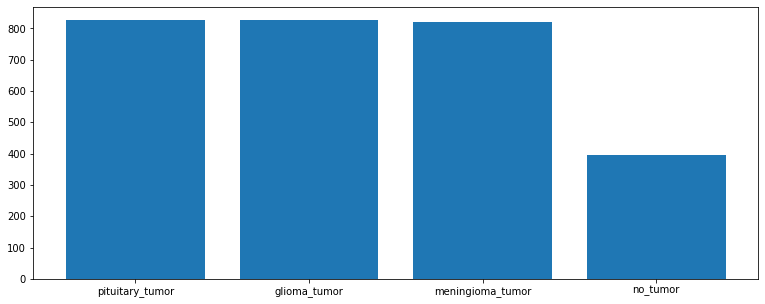

In [186]:
plt.figure(figsize=(13,5))
plt.xticks(np.arange(43))
plt.bar(train_dis.index, train_dis.values)

In [187]:
test_dis = test_df['Class'].value_counts()
test_dis

meningioma_tumor    115
no_tumor            105
glioma_tumor        100
pituitary_tumor      74
Name: Class, dtype: int64

<BarContainer object of 4 artists>

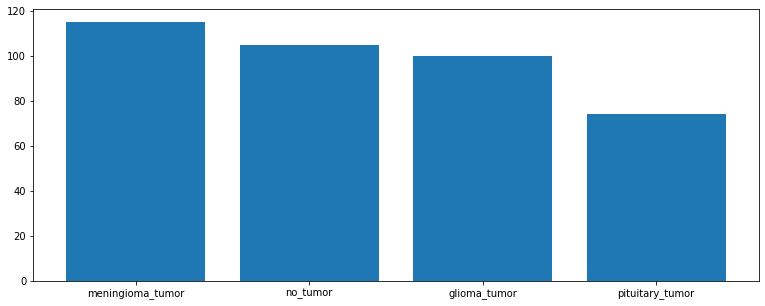

In [188]:
plt.figure(figsize=(13,5))
plt.xticks(np.arange(43))
plt.bar(test_dis.index, test_dis.values)

# **Dataloaders and Augmentations**

Creating imports of this section

In [189]:
import torch
import pathlib


import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

In [190]:
# Data Augmentation using transforms
train_transforms = transforms.Compose([
                                        transforms.Resize(512),
                                        transforms.RandomCrop(512),                           
                                        transforms.RandomHorizontalFlip(p=0.5),
                                        transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
                                        transforms.RandomVerticalFlip(p=0.5),
                                        transforms.RandomRotation(degrees=(30, 70)),
                                        transforms.ToTensor(),
                                        # transforms.Normalize((0.5, 0.5, 0.5),
                                        #                       (0.5, 0.5, 0.5))
                                     ])

data_path = pathlib.Path('.')/'afhq'  # Using pathlib to be compatible with all OS's
train_ds = ImageFolder(TRAIN_FOLDER, transform=train_transforms)

In [191]:
test_transform = transforms.Compose([
    transforms.Resize(512),
    transforms.ToTensor(),
    # transforms.Normalize(
    #     mean=[0.5, 0.5, 0.5],
    #     std=[0.5, 0.5, 0.5]
    # )
])
test_ds = ImageFolder(TEST_FOLDER, transform=test_transform)

In [192]:
BATCH_SIZE=4
NUM_WORKERS=1

train_dataloader = DataLoader(
    train_ds, batch_size=BATCH_SIZE, shuffle=True,
    num_workers=NUM_WORKERS, pin_memory=True
)

Testing the dataloaders

In [194]:
#Dataloaders output a 4 dimensional tensor - [batch, channel, height, width]
batch = next(iter(train_dataloader))
train_images_batch, train_labels_batch = batch
print(f"Feature batch shape: {train_images_batch.size()}")
print(f"Labels batch shape: {train_labels_batch.size()}")

Feature batch shape: torch.Size([4, 3, 512, 512])
Labels batch shape: torch.Size([4])


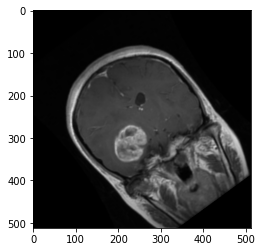

In [195]:
image = train_images_batch[0]
image = image.permute(1,2,0)
plt.imshow(image)

In [196]:
train_labels_batch[0]

tensor(0)

In [197]:
train_ds.class_to_idx

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

In [ ]:
# TODO: Splitting training dataset to have a validation
# Example:
# new_train_data, _,_ = torch.utils.data.random_split(img_dataset,
#                                                     [250, 100, 14280])

In [ ]:
# Show a batch 
def show_batch(batch_images, batch_labels):
  for i in len(batch_images):
    plt.subplot(2,i+1)
    plt.imshow(batch_images[i].permute(1,2,0))

show_batch(train_images_batch, train_labels_batch)

# **Credits**
- Displaying images: Radhika's Notebook https://github.com/radhikasethi2011/Neuromatch_Fila/blob/main/colab/visualing.ipynb
- Brain Tumor Classification (MRI) Dataset:https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri